In [32]:
import sys
for module in [module for module in sys.modules if 'mapping' in module]:
    sys.modules.pop(module)

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

from mapping.behavioral import Behavior, BehavioralAnalyses, figs_and_text
from mapping.classifier import Classifier
from mapping.experiment import Experiment, LoadData, demo
from mapping.neuron import Neuron
from mapping.population import Population, PopParams

%matplotlib inline

### wrapper functions

In [18]:
def print_anova(res, title):
    p_rew = res.ix['C(rew)', 'PR(>F)']
    p_monkey = res.ix['C(monkey)', 'PR(>F)']
    p_int = res.ix['C(rew):C(monkey)', 'PR(>F)']

    print('*** 2-way anova on %s' %title)
    print('reward %1.4f, monkey %1.4f, interaction %1.4f' %(p_rew, p_monkey, p_int))
    
def print_wilcoxons(p_monkey, p_dir, p_set, title):
    if title == 'Hit Rate':
        p_monkey = ba.hr_per_monkey()
        p_dir = ba.hr_per_dir()
        p_set = ba.hr_per_set()
    elif title == 'Reaction Time':
        p_monkey = ba.rt_per_monkey()
        p_dir = ba.rt_per_dir()
        p_set = ba.rt_per_set()
    else:
        raise Exception

    p_all = pd.concat([
        p_monkey.iloc[0],
        p_dir.iloc[0],
        p_set.iloc[0]
    ])

    print('*** Pair-wise Wilcoxons')
    for k,v in p_all.iteritems():
        print('\t%s:    %1.4f' %(k,v))

# Behavioral

#### Proportion time spend licking as a function of time relative to reward onset for rewarded trials (blue) and neutral trials (red).

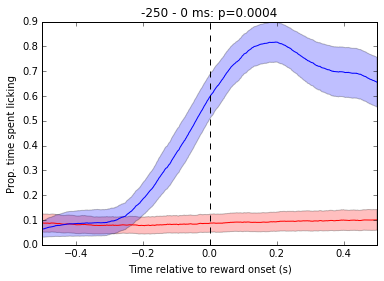

*** 2-way anova on licking
reward 0.0063, monkey 0.3039, interaction 0.3257


In [23]:
ba = BehavioralAnalyses()
ba.plot_licking()
p_licking = ba.licking_across_monkey()
print_anova(p_licking, title='licking')

#### Hit rate for rewarded trials (blue) and neutral trials (red).

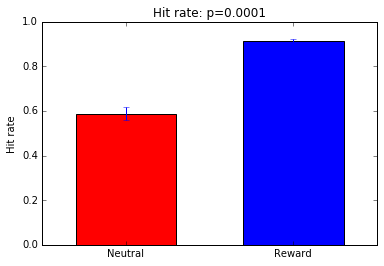

*** Pair-wise Wilcoxons
	Tom:    0.0022
	Spaghetti:    0.0180
	Ipsi.:    0.0001
	Contra.:    0.0001
	Cue set 0:    0.0001
	Cue set 1:    0.0001


/Users/syi115/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2073: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [22]:
ba.plot_hr()
print_wilcoxons(
    p_monkey=ba.hr_per_monkey(),
    p_dir=ba.hr_per_dir(),
    p_set=ba.hr_per_set(),
    title="Hit Rate"
)

#### Reaction times for rewarded trials (blue) and neutral trials (red).

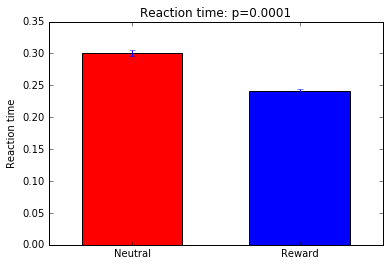

*** Pair-wise Wilcoxons
	Tom:    0.0022
	Spaghetti:    0.0180
	Ipsi.:    0.0001
	Contra.:    0.0001
	Cue set 0:    0.0001
	Cue set 1:    0.0001


/Users/syi115/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2073: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [21]:
ba.plot_rt()
print_wilcoxons(
    p_monkey=ba.rt_per_monkey(),
    p_dir=ba.rt_per_dir(),
    p_set=ba.rt_per_set(),
    title="Reaction Time"
)

# Example Neurons

#### Example neurons plots including
* PSTH for each `reward condition`
* PSTH for each `reward condition` and `spatial location`
* Heatmap of `receptive field` for fitted 2-dimensional gaussian in each `reward condition`

Loading neuron tn_map_121614 elec17U


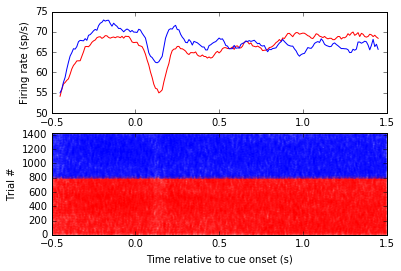

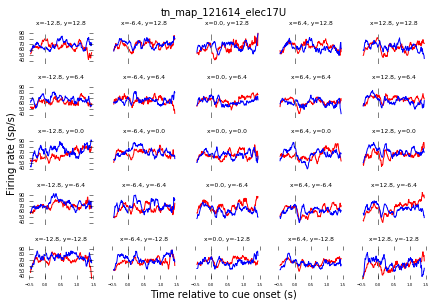

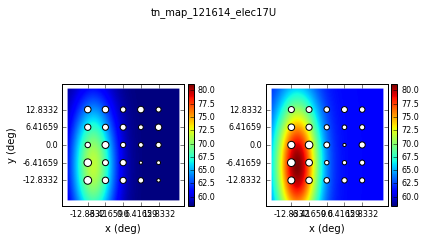

Loading neuron tn_map_121614 elec3b


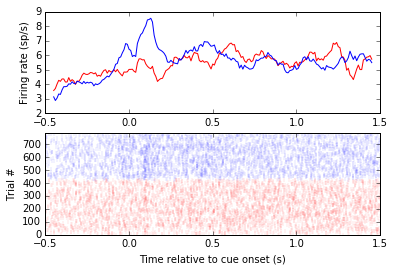

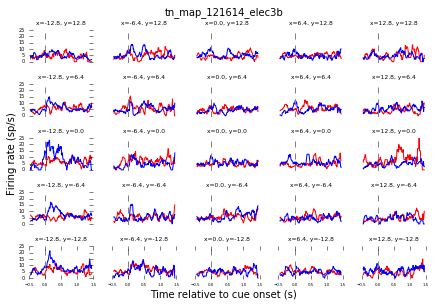

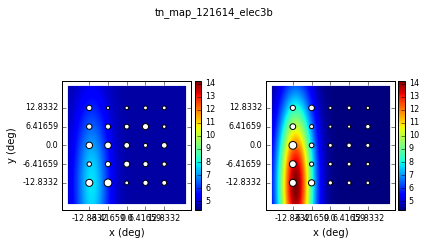

Loading neuron tn_map_121214 elec13U


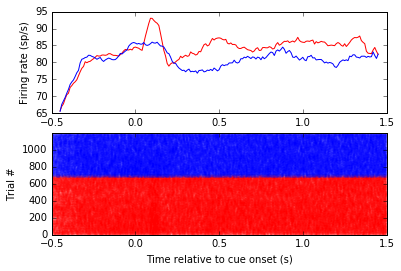

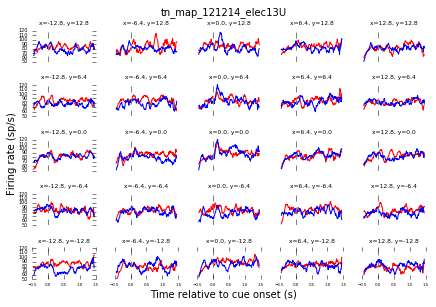

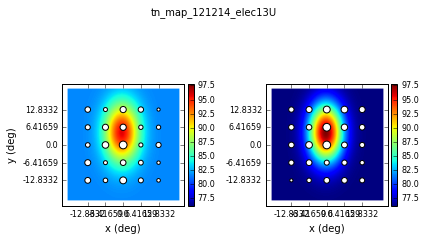

Loading neuron tn_map_122914 elec7U


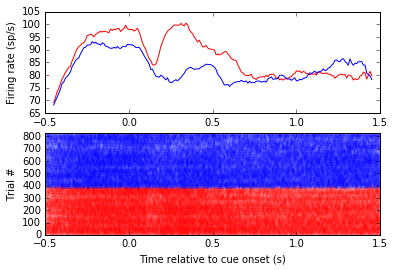

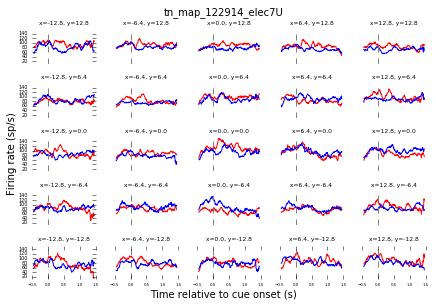

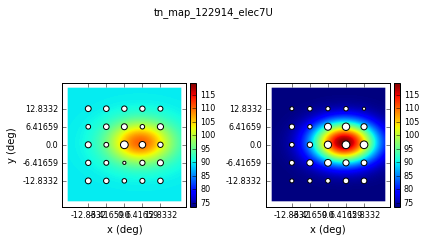

Loading neuron tn_map_123014 elec11U


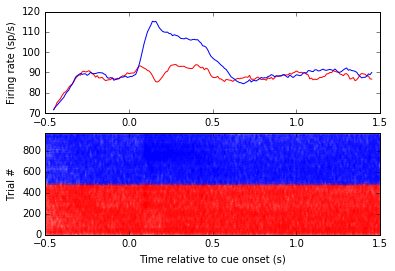

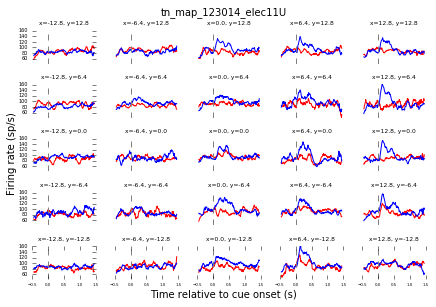

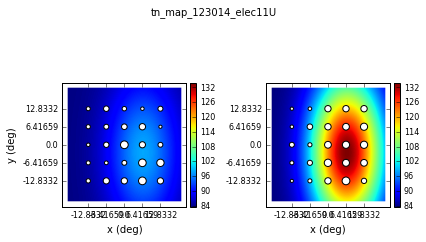

Loading neuron tn_map_123014 elec9U


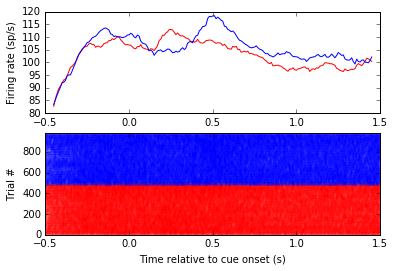

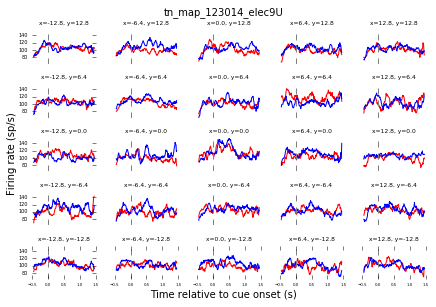

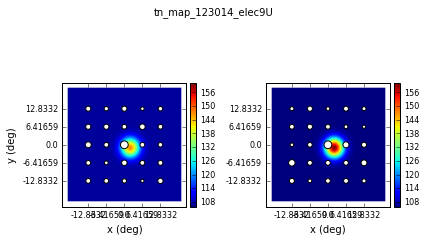

Loading neuron tn_map_120914 elec10a


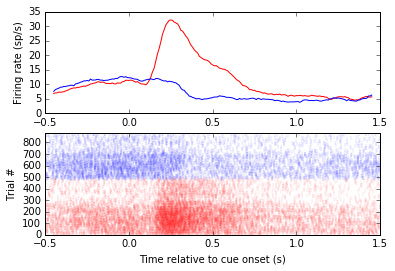

/Users/syi115/.local/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


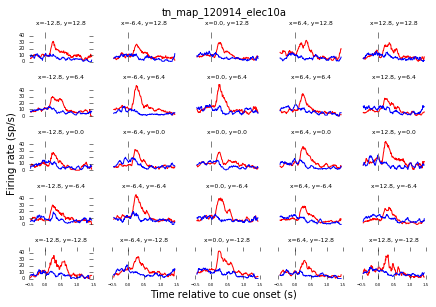

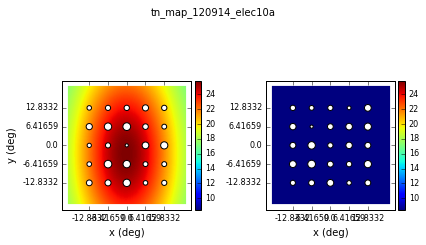

Loading neuron tn_map_120914 elec21a


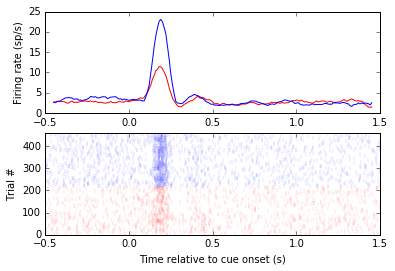

/Users/syi115/.local/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


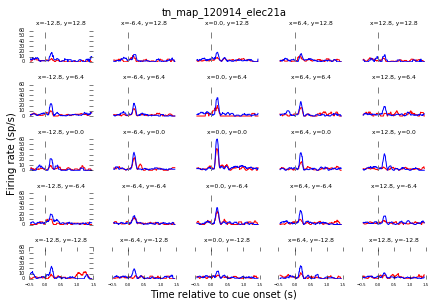

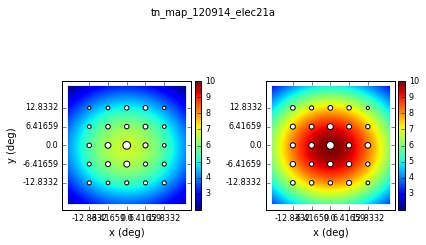

Loading neuron tn_map_121114 elec11U


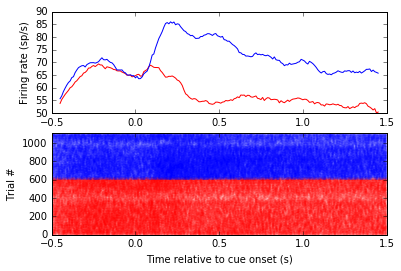

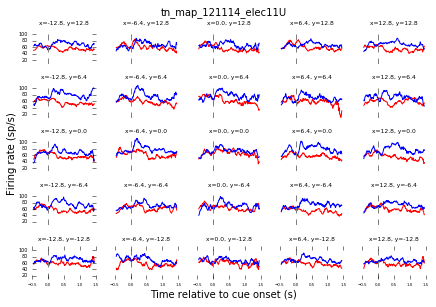

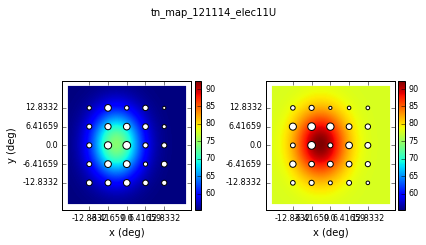

In [34]:
demo(one_example=False)

# Population data

#### Population results for receptive field centers
* Scatter plot of receptive field center for each individual neuron
    * Blue/red indicates REW+/REW-, respectively
* Average receptive field center location for REW+ (blue) and REW-(red) neurons
    * left (negative x values) in contralateral (CHECK ON THIS)

saving: /Users/syi115/GitHub/MappingData/model_testng


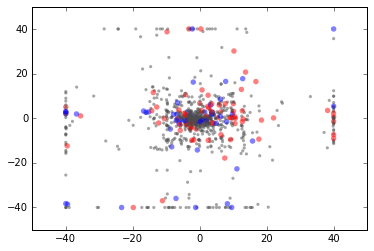

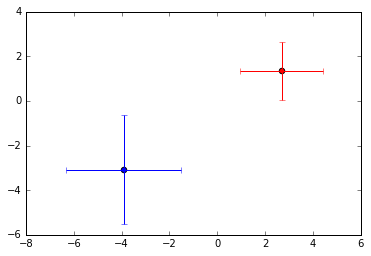

In [4]:
pop = PopParams()
pop.xy_scatter()

# Classifier

#### attempt to group neurons with K-means

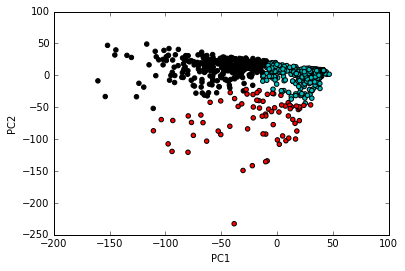

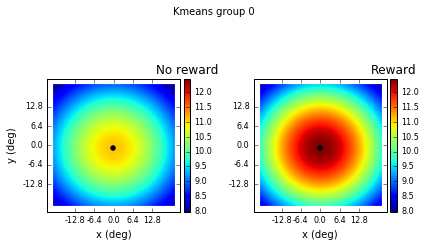

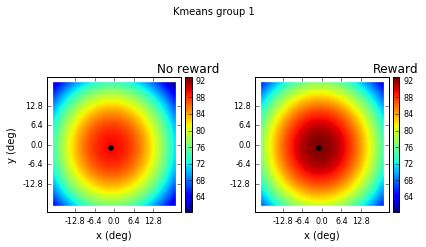

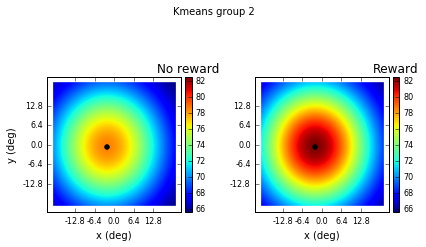

In [37]:
# create clasifier object    
c = Classifier()   
X = c.get_good_betas(monkey=None)
X1 = c.pca(plot_it=False)    

# classify neurons into 'n_clusters' groups
labels = c.kmeans(X, X1, n_clusters=3)
#c.kmeans_exploratory(X, labels)
#c.kmeans_targeted(X, labels)
c.heatmaps(X, labels)